# Documentation


## Introduction

The ability to compute rates is fundamental to nearly all areas of scientific understanding ranging from basic science to machine learning. In order to gain insights into the inner workings of a system, we must be able to understand how that system changes over time, and how different perturbations affect those changes. Oftentimes we can model the phenomena underlying a system through equations, such as those that describe temperature, motion, and force, to name a few. However, many real-world phenomena are too complex to be reduced to simple mathematical equations. Not only are these equations complex, but it can be very onerous to compute their derivatives by hand, which is necessary for a number of different applications (described below). While numerical differentiation techniques like the method of finite differences offers an alternative to symbolic differentiation for functions whose derviative cannot be computed analytically, the discretization of the problem introduces round-off errors that can accumulate to give an ultimate answer that is not accurate enough for the scientific applications at hand. Our software provides a streamlined, automated computational tool to quickly calculate the derivatives of functions by composing elementary mathematical operations. Automatic differentiation avoids the expression swell of symbolic differentiation and the imprecision of numerical differentiation. The overarching motivation of automatic differentiation is to compute the rate of change for a function of arbitrary complexity through the use of point values and elementary derivatives. AD allows us to get a numerical value of a function's derivative without approximation error.

The equations that describe these sorts of situations are often complex and messy to work with, but there are a number of ways we can gain insight from them. If we want to understand not just the current state of a system but also how it changes over time, we need to take the derivative of these complex equations.  Moreover, oftentimes it is useful to model the local behavior of a system within an extremely small window. In such instances, we may find it helpful to use a derivative . Lastly, if we want to identify extreme cases, we will need to take a derivative to identify extrema or inflection points. Our automatic differentiation package allows us to accomplish all of this to the accuracy of machine precision. 


## Background


**Automatic differentiation** is a series of processes automated by a computer program to calculate the derivative of a given function. 

A function consists of **elementary functions**, which are the building blocks of more complex functions. They are functions of a single variable (real or complex). Examples of such functions involve taking sums, products, polynomial, exponential, inverse. 

The decomposition of derivatives is enabled by the **chain rule**. 
For a given function $h(u(t), v(t))$:

$\frac{dh}{dt}$=($\frac{\partial h}{\partial u}$)($\frac{du}{dt}$)+($\frac{\partial h}{\partial v}$)($\frac{dv}{dt}$)

AD has two modes: the forward mode and the reverse mode. In this project milestone 1, we will apply **chain rule** in forward mode from inside to outside. The corresponding **graph structure of the forward mode** first calculates forward primal trace, forward tangent trace and passes of the independent variables. Then, it computes those of the dependent variables. 

The function can be accomplished using **Dual Number**. **Dual Number** is similar to **Complex Number** ($z=x + iy$ where x is the real part and y is the imaginary part. $i^{2}=-1$). Dual Number can be expressed in the form of $z=a+b*epilson$ where a,b are real numbers, $epilson^{2}=0$ and $epilson!=0$. In the context of automatic differentiation, the real part of the dual number corresponds to the primal trace whereas the dual part corresponds to the tangent trace. 

We need to apply **operator overloading** on the Dual Class. **Operator overloading** is the act of changing the behavior of an operator on its arguments. Depending on the exact argument the operator acts on, the operator may implement differently. Therefore, operator overloading is a form of polymorphism. 

When we have multiple variables, we can express the partial derivatives in the form of **Jacobian**. For a function $f(x)$ : $R^{m}$ -> $R^{n}$, the **Jacobian** is a n*m matrix consisted of the first derivatives of the mapping. 

**Newton’s method** belongs to a class of algorithms which can be solved using AD. Newton’s method is a root-finding algorithm of a non-linear function f(x) to satisfy f(x)=0. An initial guess is taken first, then Newton’s method runs iteratively to find the root of the function. Convergence depends on good initial guesses and is not guaranteed. 

### Graph structure of calculations
For the forward mode, the graph structure of the auto differentiation first calculates forward primal trace, forward tangent trace and passes of the independent variables. Then, it computes those of the dependent variables. 
For the reverse mode, the graph structure works backward from the outputs to the inputs. Since the last node has no children, the initial value of the adjoint of the last node will be 1. Then the second to last node’s adjoint is evaluated iteratively until reaching the adjoint of the last node in reverse order.

### Elementary functions 
Elementary functions are the building blocks of more complex functions. They are functions of a single variable (real or complex). Examples of such functions involve taking sums, products, polynomial, exponential, inverse. 



## How to Use 

Users can access the Jacobian of a self-defined function using our package with multiple inputs.

### Step 1 - Installation: 
Currently, our package can be git cloned with the following command:

In [ ]:
git clone https://github.com/cs107-4thPrime/cs107-FinalProject.git

You can also install it with test pypi with the following command:

In [ ]:
pip install -i https://test.pypi.org/simple/ cs107Prime==0.0.2

### Step 2 - Install Dependencies:
Navigate into the cloned folder ‘cs107-FinalProject’ and install the dependencies by command:


In [ ]:
pip install -r requirements.txt

### Step 3 - Run Tests:
Run all the given tests in the tests folder.
This will report how many tests are passing and failing and the coverage report of the tests. 
We have three files (test_dual.py, test_derivatives.py, test_reverse.py, test_derivatives_reverse.py) to test each of the two modules and an integration test (test_integrate.py). 

Codes that can run locally to generate the same result. 

In [ ]:
pytest --cov=src/cs107_4thprime tests/

Picture of our code coverage result: 

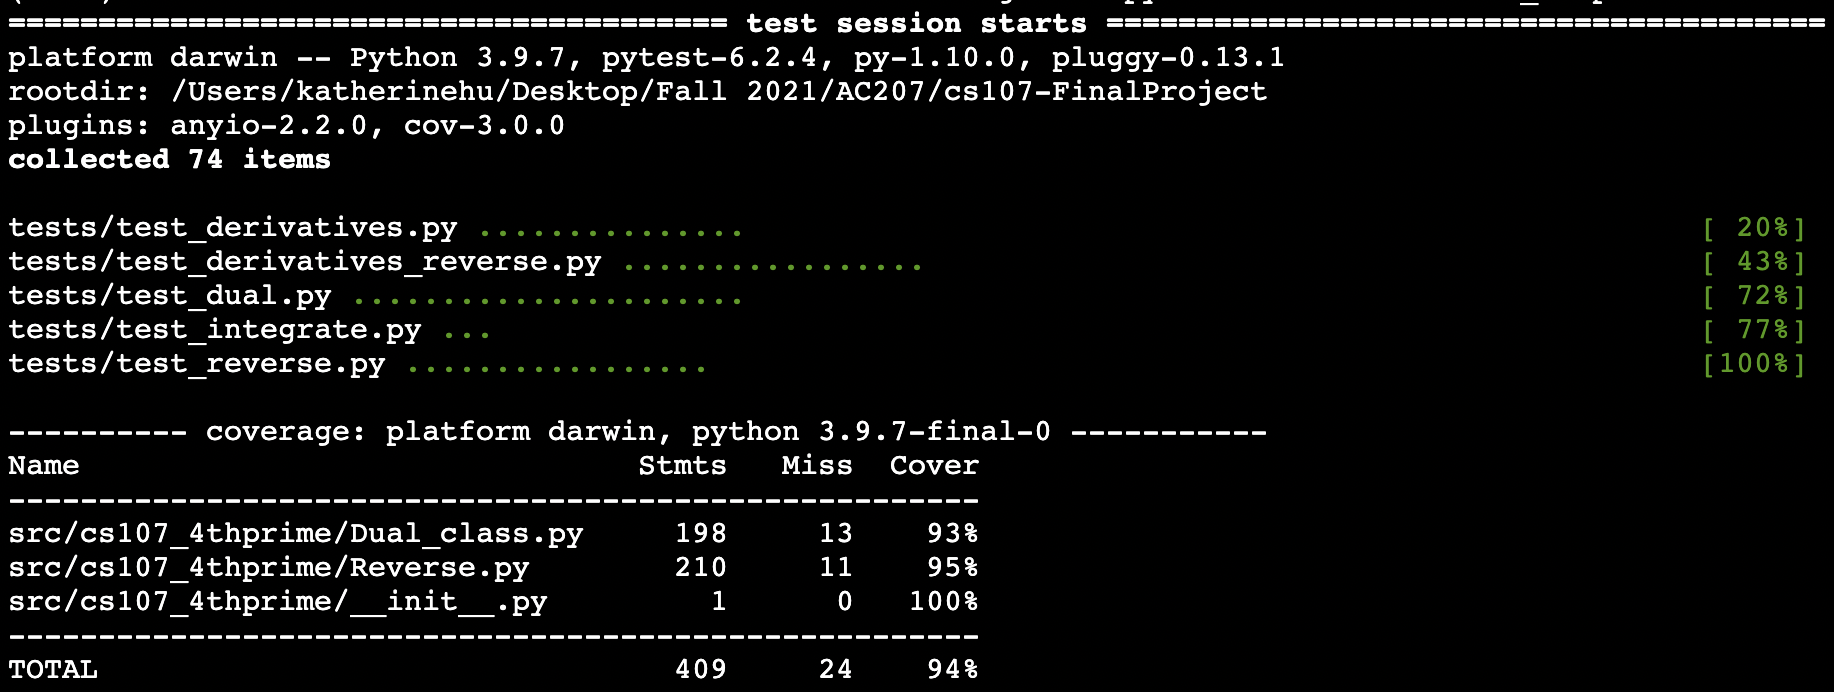

### Demo with Forward Mode

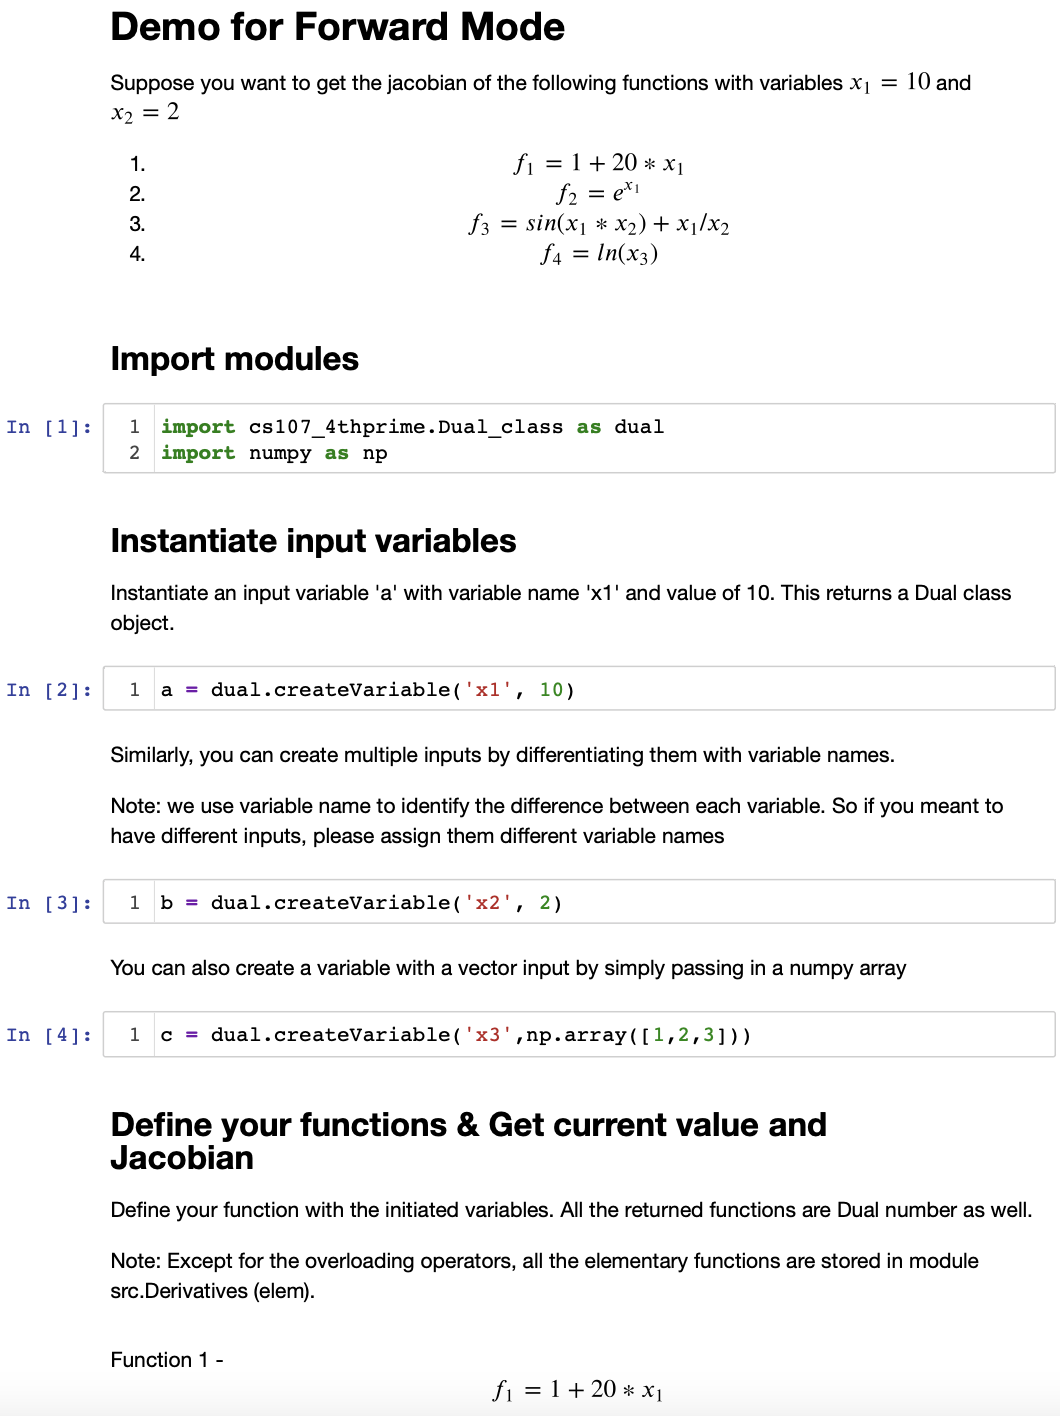

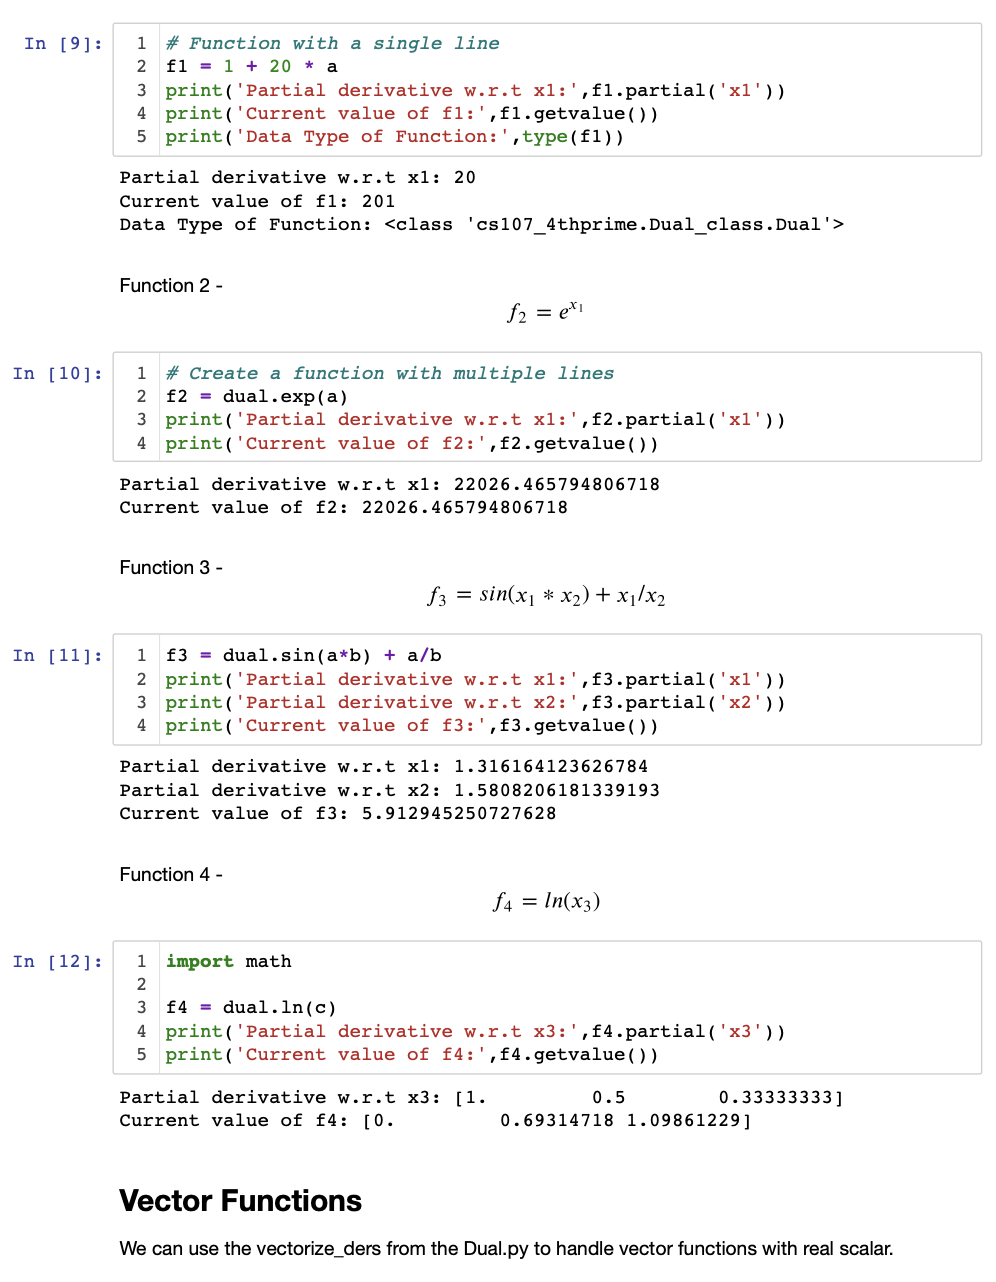

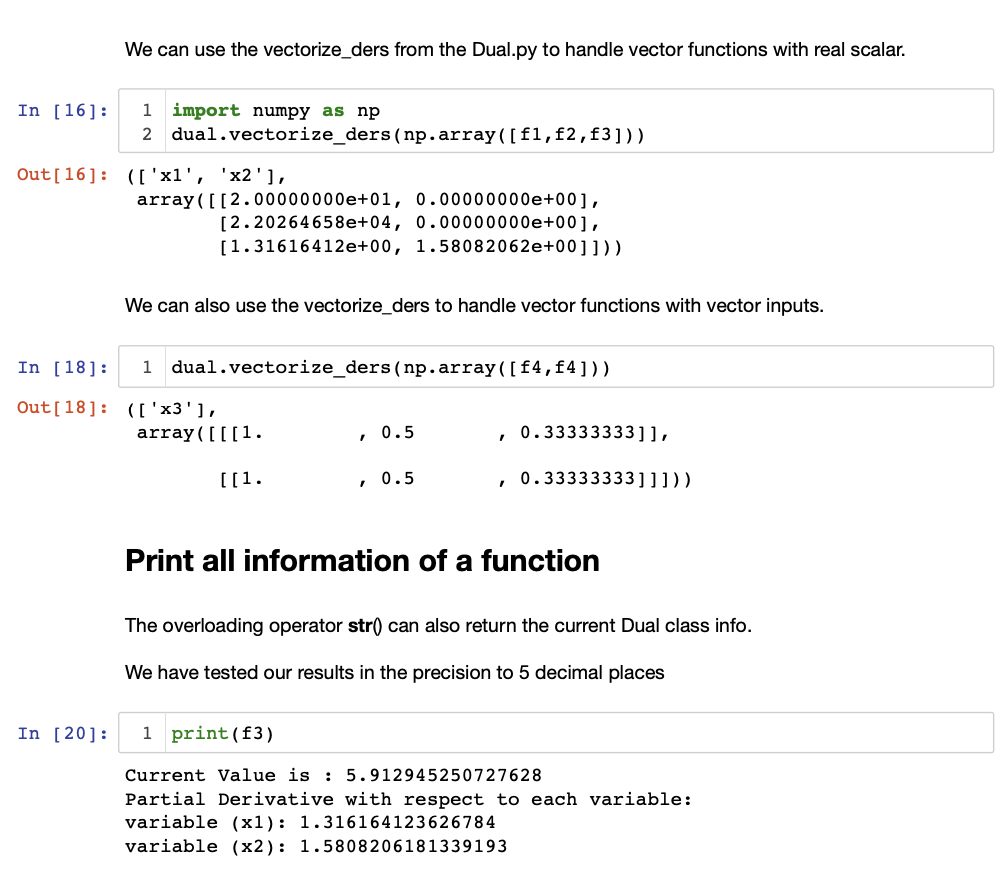

### Demo with Reverse Mode

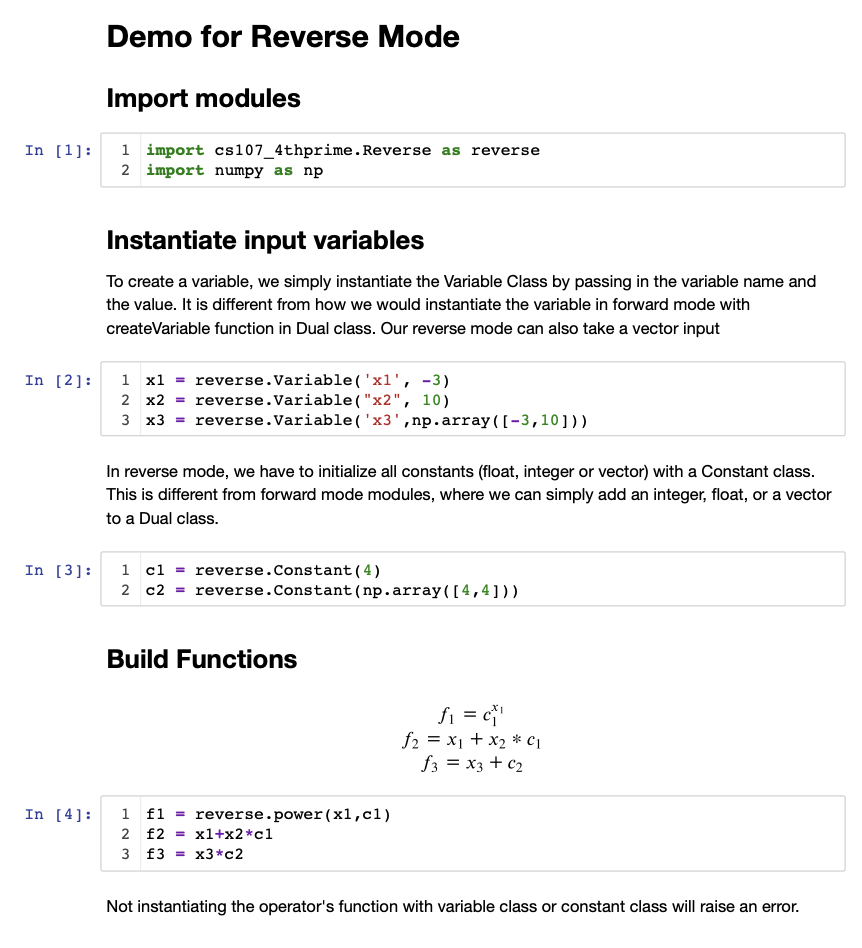

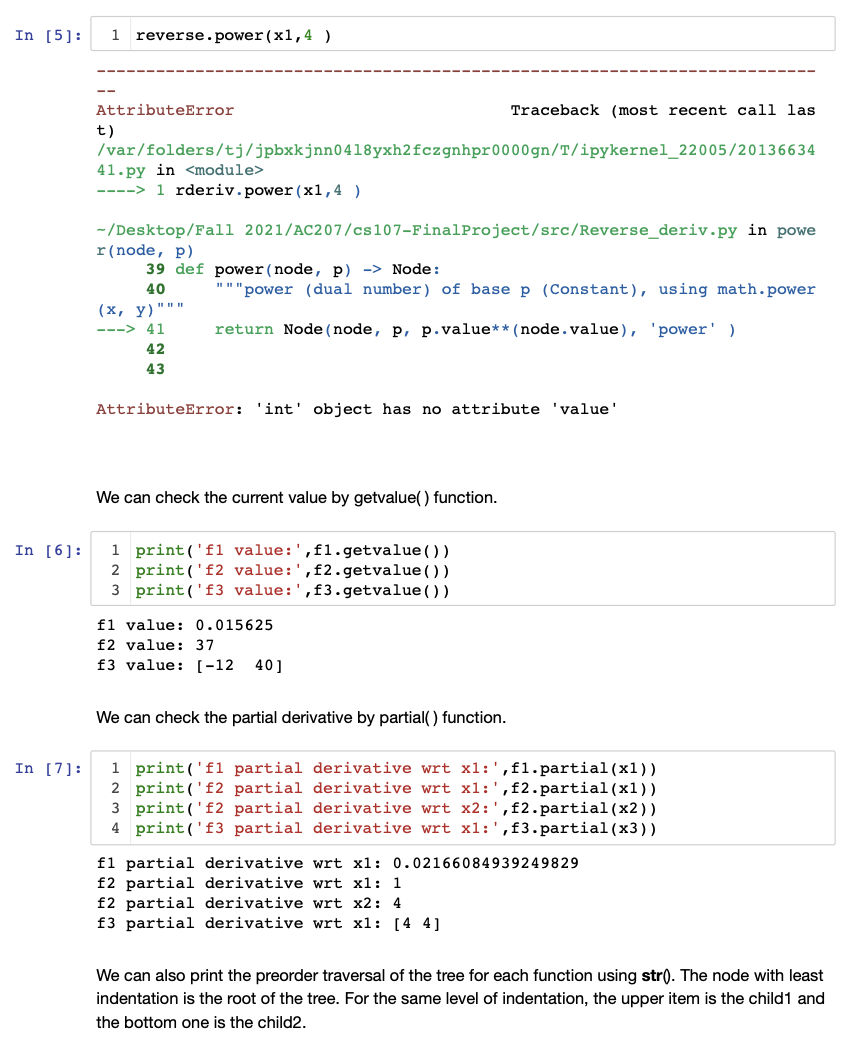

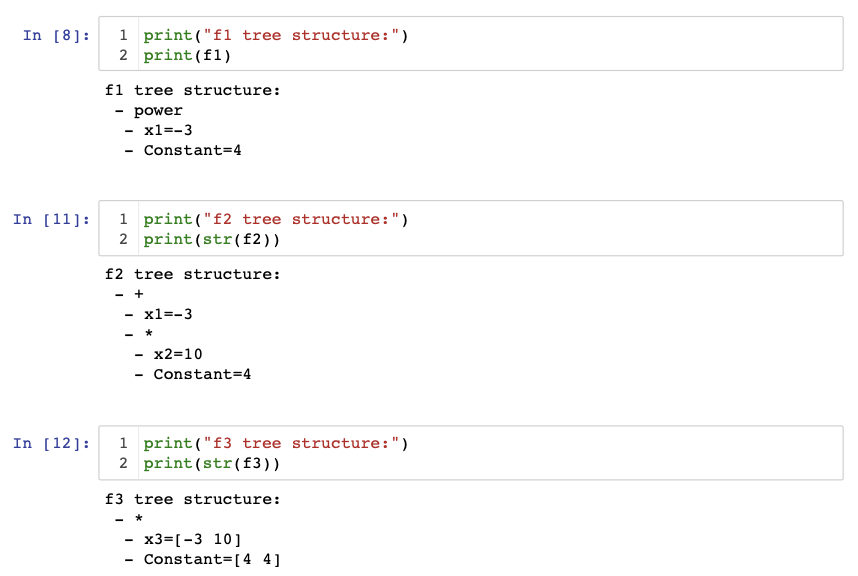

### Software Organization

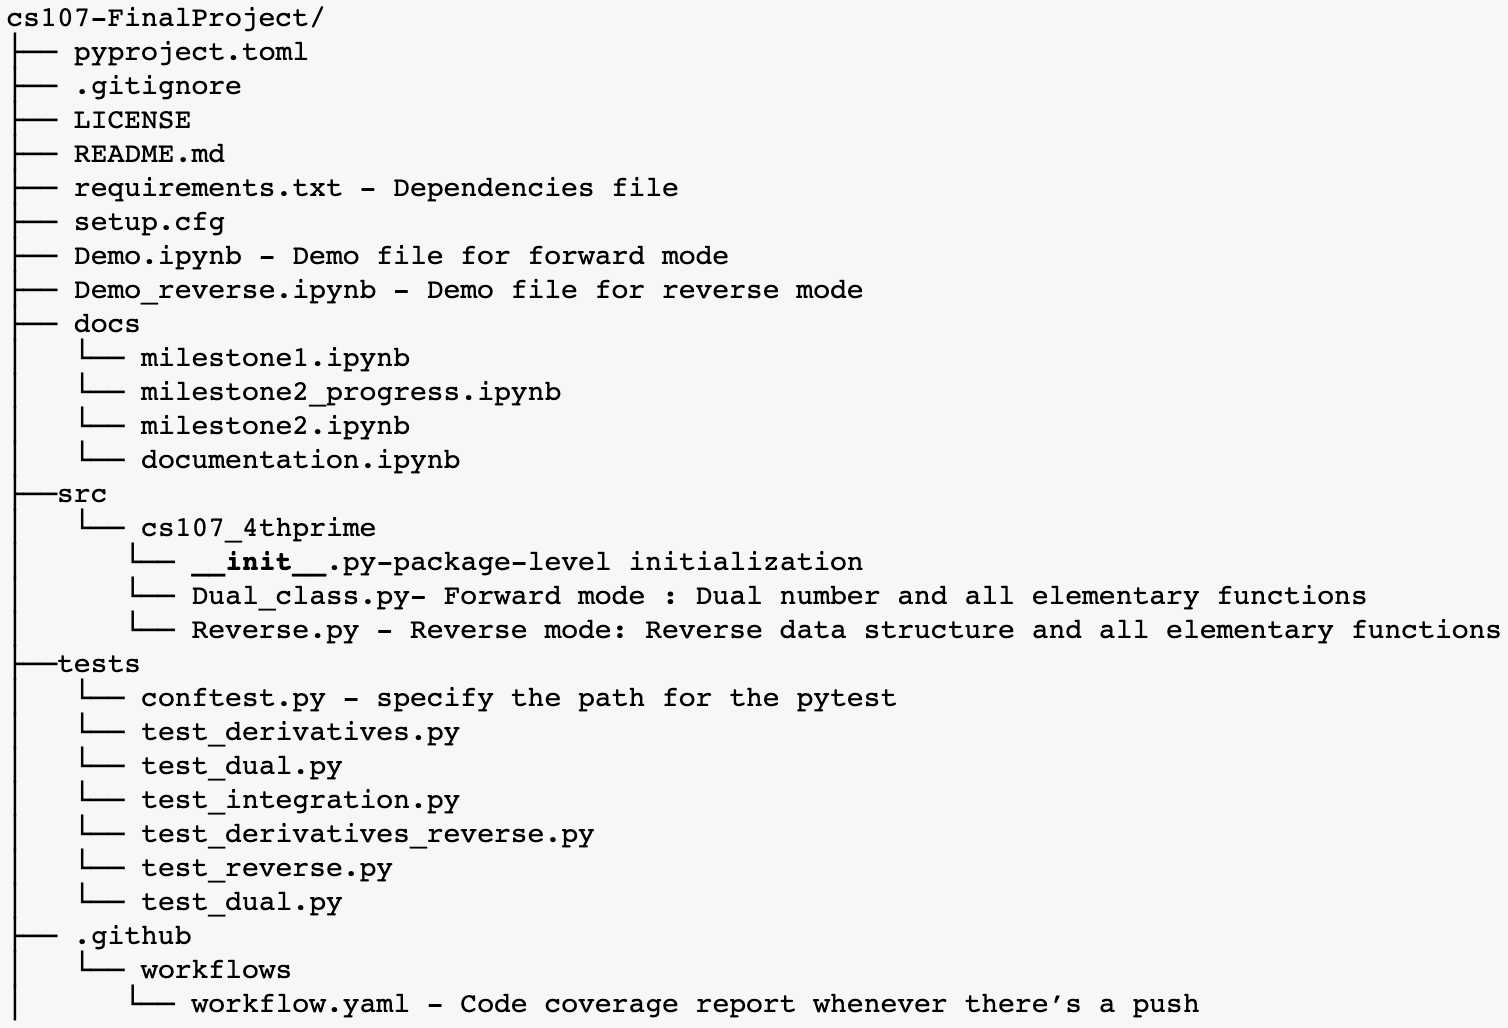

What modules do you plan on including? What is their basic functionality?
- We have the Dual_class.py for the Dual number data structure and all the additional elementary functions which can be implemented on the Dual number. The Dual class in Dual_class.py includes an initialization function, a string function, representation function, partial function, gradient function, and multiple overloading operators. Elementary functions that are not included in the Dual class such as exponent, natural log and square root are written in the Derivatives.py.
- For reverse mode AD, we have Reverse.py which stores the Constant, Variable, and Node class which is our main data structure, and all the additional elementary functions that we also have for the forward mode. To use the reverse mode, we always start with initializing a constant with a Constant class or a variable with the Variable class. Then we basically do the operation, such as addition, multiplication, or exponent which is the same as how we do the operation using forward mode AD. 


Where will your test suite live? Where do the tests live? How are they run? How are they integrated?

- We will test our code with CodeCov which gives insight into code coverage
- To run the test, simply run the command code in the root folder: pytest --cov=src tests/
- We have written the tests with current code coverage of 95% . All the tests are stored in the tests directory. There are in total three test files. 
    - test_derivatives.py: test all the elementary functions
    - test_dual.py: test all the Dual number functions 
    - test_integrate.py： integration test on both elementary functions and Dual number overloading operators
    - test_derivatives_reverse.py: test all the elementary functions for reverse mode
    - test_reverse.py: test all the Reverse functions for forward mode



How will you distribute your package (e.g. PyPI)?
- Our package will be distributed through github repo and Test PyPI



## Implementation

### **Dual_class.py**

We have a **Dual** class and all the elementary functions for the forward mode in this file. 

Dual numbers are the core data structure utilized in our implementation of forward mode automatic differentiation. By defining a dual number class and taking advantage of Python’s operating overloading capabilities, we are able to simplify otherwise messy derivative calculations into a series of simple steps. Our dual class works by storing both the current value of the function under evaluation as well the values of its partial derivatives at that point. We chose to use a dictionary to store the dual component as it enables easy lookups for our function’s partial derivatives. Additionally, the derivatives dictionary as a whole represents our function’s gradient at a particular point. By recasting the elementary binary operations of addition, subtraction, multiplication, and division to work properly on numbers of the dual class, we are able to capture and track both our function’s value and partial derivative values as we trace through its computational graph. 

Function **createVariable(variable_name, value)** helps initialize a Dual number whenever we want to add a variable. It takes in string variable_name - the unique name for the variable - and a number value  -the current value stored in the variable. This returns a Dual number with the variable information stored. The reason why we decided to add this function is that we want to make variable initialization easy. If we don’t have this function, the user has to initialize the Dual class by providing a value, and a dictionary that only stores the first variable and the derivative of 1 which is very confusing for users without any idea about our data structure. 

Updated: Function **vectorize_ders(fs)** takes in a numpy array of n functions which are Dual Class with array shape being (n,).  It returns a sorted list of variable names of length m, and a 2d array of derivatives with shape (n,m) where n is the number of functions and m is the number of variables in all functions. Row i stores the Jacobian of the ith function in the passed-in function array. Column j stores the partial derivative of the function to the jth variable in the variable list. 



We have covered 16 functions in Dual class. The specifics are the in the following:
- **\__init\__(self,value, ders)** takes in a number (value) and a dictionary (ders) to initialize the Dual number. Value is the current value of the Dual number, and the dictionary stores the Jacobian
- **partial(self,variable_name) -> float** : Get the partial derivative in float type  with respect to the given variable_name
- **gradient(self) -> dict**: Get the Jacobian dictionary that contains the current partial derivatives with respect to each variable
- **getvalue(self) -> float**: Get the current value of the Dual number
- **\__str\__(self) -> str**: a string that shows the current value and Jacobian
- **\__repr\__(self) -> str**: a string that can reconstruct the Dual with eval()
- **\__add\__(self, other) -> Dual**: Dual(self) + other where other can be Dual or a constant
- **\__radd\__(self,other) -> Dual**: other + Dual(self) where other is a constant
- **\__mul\__(self,other) -> Dual**: Dual(self) * other where other can be Dual or a constant
- **\__rmul\__(self,other) -> Dual**: other * Dual(self) where other is a constant
- **\__sub\__(self,other) -> Dual**: Dual(self) - other where other can be Dual or a constant
- **\__rsub\__(self,other) -> Dual**: other - Dual(self) 
- **\__truediv\__(self,other)  -> Dual**: Dual(self) / other where other can be Dual or a constant
- **\__rtruediv\__(self,other)  -> Dual**: other / Dual(self) 
- **\__pow\__(self,other)  -> Dual**: Dual(self) ** other where other can only be a constant
- **\__neg\__(self) -> Dual**: -Dual(self) which is negative of Dual


The implementation of derivatives relies on the property of the dual number. Dual number in the context of automatic differentiation has its real part corresponding to the primal traces and its dual part corresponding to the tangent trace. Derivative.py takes in dual class’ instance as input and includes the derivative definitions of a comprehensive array of elementary functions. The value of a given elementary function is computed by evaluating it at the primal trace (a.value).  The derivative of a given elementary function is computed using the chain rule: multiplying the derivative of the function evaluated at primal trace with the tangent trace (value in a.ders).
 
We have covered 14 elementary functions in Dual_class.py. The specifics are the in the following:
- Trig functions
    - **sin(a)** function takes in Dual number a as input and calculates the sine of dual number a. 
    - **cos(a)** function takes in Dual number a as input and calculates the cosine of dual number a.
    - **tan(a)** function takes in Dual number a as input and calculates the tangent of dual number a.
- Inverse trig functions
    - **arcsin(a)** takes in Dual number a as input and calculates the inverse of sine of dual number a. 
    - **arccos(a)** takes in Dual number a as input and calculates the inverse of cosine of dual number a. 
    - **arctangent(a)** takes in Dual number a as input and calculates the inverse of tangent of dual number a. 
- Exponential functions
    - **exp(a)** function takes in Dual number a as input and calculates the power a of base e.
    - **power(a, p)** function takes in two arguments: Dual number a  and base p (integer or float) and calculates the power a of base p.
- Hyperbolic functions
    - **sinh(a)** takes in Dual number a as input and calculates sinh of dual number a.
    - **cosh(a)** takes in Dual number a as input and calculates the cosh of dual number a.
    - **tanh(a)** takes in Dual number a as input and calculates the tanh of dual number a. 
- Logistic functions
    - **logistic(a)** takes in Dual number a as input and calculates the logistic value of dual number a. 
- Logarithms
    - **ln(a)** function takes in Dual number a as input and calculates its natural log.
    - **log(a, base)** function takes in two arguments: Dual number a and base (integer) and calculates the log of dual number a with base n. 
- Square root
    - **sqrt(a)** takes in Dual number a as input and calculates the square root of dual number a. 


## Extension Feature (Reverse Mode):

We extend our software package to support reverse mode automatic differentiation. One of the drawbacks of our forward mode implementation is that it scales linearly with the number of inputs that we wish to find derivatives with respect to. This makes forward mode very costly and inefficient for calculating the gradient of large functions of many inputs (as is often the case in machine learning applications.) By taking advantage of the symmetry of the chain rule and storing the parent-child relationships on our first pass, we can actually compute complex gradients in two passes (one forward and one reverse pass). This is the functionality and flexibility that we will enable in reverse mode. 

Node class is the core data structure utilized in our implementation of reverse mode AD. A Node is mainly a tree structure that stores two childs, a current value of the Node, and an operator that describes the operation done on child one and child two to achieve the current value. The two children each are a Node or a Variable or a Constant. The leaf nodes must be initialized using a Constant class or Variable class. When calling the elementary functions from Reverse_deriv.py, the function returns a Node class initialized with the correct children, value and operator. In addition, a new Node class can be built by using two node classes linked by an operator such as addition, subtraction, multiplication and division. To retrieve the current value of a function, the .getvalue() function can be used. To retrieve the partial derivative, the .partial(var) function can be used. 

### **Reverse.py**

#### Node Class
- **__init__(self,child1, child2 = None, value = None, operator: str)** : takes in a child1 (Variable, Constant or Node), a child2 (None, Variable, Constant or Node), value(current value by doing the operator on the child1 and child2), operator(string that describes the operation done on child1 and child2) . It is the underlying data structure of the reverse mode.

    Possible operator: '+', '-', '*', '/', '**', 'power', 'log', 'ln','sqrt', 'sin', 'cos', 'tan', 'asin', 'acos', 'atan', 'exp', 'sinh', 'cosh', 'tanh', 'logistic', 'sqrt'

- **getvalue(self)**: return the current value
- **_isValid(self) -> boolean**: check if the input is a Node, Variable or Constant
-  **_getvariable(self) -> set**: return a set of variables being used in this function
- **_str(self, i) -> str**: helper function for __str__
- **__str__(self) -> str**: a string that shows the tree structure of the Node. 
- **__repr__(self) -> str**: a string that can reconstruct the Node with eval()
- **__add__(self, other) -> Node**: self + other where other can be **Node**, Variable or a Constant, return a Node(child1 = self, child2 = other, value = self.value+other.value, operator = ‘+’)
- **__mul__(self,other) -> Node**: self * other where other can be **Node**, Variable or a Constant
- **__sub__(self,other) -> Node**: self - other where other can be **Node**, Variable or a Constant
- **__truediv__(self,other)  -> Node**: self / other where other is a **Node**, Variable or  Constant
-  **__pow__(self,other)  -> Node**: self ** other where other can only be a Constant
- **__neg__(self) -> Node**:-self which is negation of Node
- **partial(self, var)**: the same thing as reverse but was implemented for better user experience because of the intuitiveness of the function naming.
-  **reverse(self, var)**:return the partial derivative of the current function with respect to the given variable.

#### Variable Class (Inherited from Node Class)

Because it inherits from Node class, all the operator loading and elementary functions that can be applied to Node class can also be used the same in Variable class. However, these operators and elementary functions will return a Node instead of a Variable. Basically Variable is the first 

- **__init__(self,name, value)** takes in a variable name (str) and a number (value) to initialize the Variable. 
- **_getvariable(self) -> set**: return a set that contains only itself
- **partial(self, var) -> dict**: return 1 if the given var is itself else 0
- **reverse(self, var) -> int**: Doing basically the same thing as partial but we want to preserve the naming convention so that this function can be used in the reverse function as part of the recursive process as the base case for the reverse mode. 
- **_str(self, i) -> str**: takes in an integer i and returns a string that shows the current value and Jacobian
- **__str__(self) -> str**: a string that shows the variable name and the value
- **__repr__(self) -> str**: a string that can reconstruct the Variable with eval()

#### Constant Class (Inherited from Node Class)
- **__init__(self, value)** takes in a number (value) to initialize the Constant Class. 
- **_getvariable(self) -> set **: return a set that contains only itself
- **partial(self, var) -> int**: Return 0 no matter what variable it is given because the derivative of a constant with respect to any variable is 0.
- **reverse(self, var) -> int**: Doing basically the same thing as partial but we want to preserve the naming convention so that this function can be used in the reverse function as part of the recursive process as the base case. 
- **__str__(self) -> str**: a string that shows the value of the constant
- **__repr__(self) -> str**: a string that can reconstruct the Constant with eval()

#### All elementary functions as in **Dual_class.py**
It has all the elementary functions in Dual_class.py with exactly the same function name. But this time, all functions return a Node class instead of a Dual class.


# Future Directions



* Expansion to second and higher order derivatives
    * Currently our AD package only has the capacity to perform first-order derivative. In the future, we hope to expand our package such that it can compute second or higher order derivatives. For example, in the case where we are finding the local maxima or minima of an energy curve, the first derivative will lead us to the local extreme but we won’t know if it is local maxima or minima if the package does not have capability to calculate the second-order derivative. 
* Molecular Dynamics (MD) simulations
    * Our developed Automatic Differentiation package can be deployed in MD simulations. Molecular dynamics provides an alternative, time-oriented method to sample thermodynamic properties of a system. During a molecular dynamics simulation, a collection of particles (atoms or molecules) is time evolved accordingly to classical mechanics. Given an initial set of positions and momenta for the particles, one computes the forces acting on the particles, and then moves the particles following Newton’s law of motion. In the context of MD simulations, forces on particles are obtained as the derivative of the interatomic potential energy with respect to their positions; hence it can be calculated with automatic differentiation. AD can also be used in sensitivity analysis because the derivatives of the output thermodynamic quantities with respect to the parameters are sought. 
* Automatic Differentiation in Quantum Chemistry with Applications to Fully Variational Hartree–Fock
    * Automatic differentiation (AD) is a powerful tool that allows for calculating derivatives of implemented algorithms with respect to all of their parameters up to machine precision. AD therefore has a great potential in quantum chemistry where gradients are omnipresent but difficult to obtain at the same time. AD has been demonstrated to be able to compute gradients with respect to any parameter throughout a complete chemistry method. _DiffiQult_, a Hartree-Fock implementation, is a developed software package to leverage the capability of AD to save human effort and time in implementations of exact gradients in quantum chemistry.<sup>1</sup> The researchers have demonstrated that they can use these obtained gradients to optimize the parameters of one-particle basis sets in the context of the floating Gaussian framework. 

## Broader Impact and Inclusivity Statement

As we reflect on the potential use cases and applications of our software package, it is important to consider the downstream consequences, be they intended or not, of our product.  Our automatic differentiation package is designed to enable fast, user-friendly, and accurate derivative computations. Potential applications of this technology are many, ranging from high-performance scientific computing, to research, to commercial deployment in neural network powered prediction systems. With this release we would like to add some words of caution and advice. One of the risks associated with this technology is aiding the facilitation of ill-willed or malicious actors. For example, groups or individuals interested in propagating fake news could deploy this package to efficiently and accurately adapt their algorithm to maximize the reach of their ideology. Like many technologies, automatic differentiation may be neutral but its users are not and therefore we must acknowledge the uncertainties and risks associated with releasing this technology to the world.

Our software promotes inclusivity and belonging in the broader scientific and industrial community by being accessible to users from all walks of life. Easily accessible and deployable due to its detailed documentation and user-friendly interface our package is agnostic to a user’s previous background or technical capability. However, it is important that we acknowledge the unseen barriers that may impact a user’s experience. For example, users who speak English as a second language may find some of our API and naming conventions unintuitive. Additionally, users without access to high-performance computing hardware may find it challenging to scale this technology to their desired level. As we work to advance our technology, we do so with an orientation toward broadening our user-base and making the power of automatic differentiation available to an even larger cross-section of the global community.

## References
1. Tamayo-Mendoza, T.; Kreisbeck, C.; Lindh, R.; Aspuru-Guzik, A. Automatic Differentiation in Quantum Chemistry with Applications to Fully Variational Hartree–Fock. _ACS Central Science_ **2018**, _4_ (5), 559–566.